In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

--2022-05-02 17:38:17--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-05-02 17:38:17--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2022-05-02 17:38:17 (4.86 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [2]:
if not os.path.exists('244942__spoonbender__wind-through-trees-3b.wav'):
    !wget https://github.com/marzepanh/telecom_tasks/blob/main/244942__spoonbender__wind-through-trees-3b.wav

In [3]:
from thinkdsp import read_wave

wave = read_wave('244942__spoonbender__wind-through-trees-3b.wav')
wave.make_audio()

In [4]:
segment = wave.segment(start=1.5, duration=1.0)
segment.make_audio()

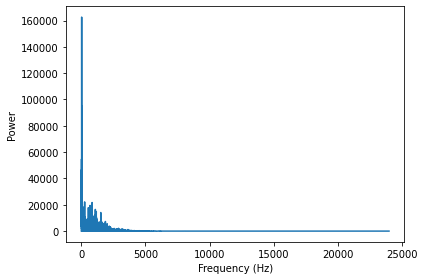

In [5]:
spectrum = segment.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

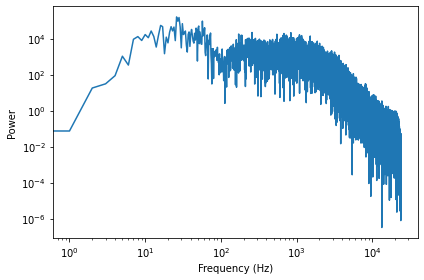

In [6]:
spectrum.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power', 
         **loglog)

In [7]:
segment2 = wave.segment(start=2.5, duration=1.0)
segment2.make_audio()

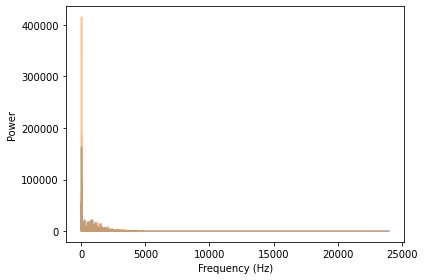

In [8]:
spectrum2 = segment2.make_spectrum()

spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

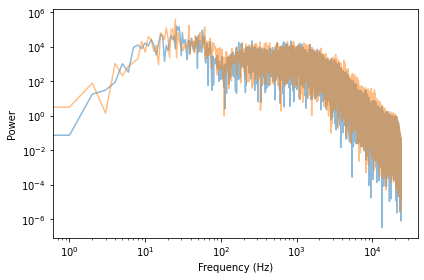

In [9]:
spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

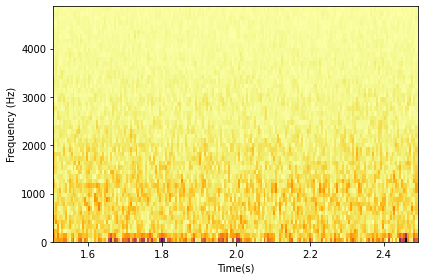

In [10]:
segment.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

Реализуем метод Бартлетта и используем его, чтобы оценить спектр мощности для шумовой волны

In [11]:
from thinkdsp import Spectrum

def bartlett_method(wave, seg_length=512, win_flag=True):
  
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    psds = [spectrum.power for spectrum in spectrums]
    
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

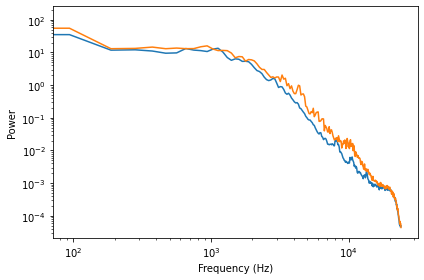

In [12]:
psd = bartlett_method(segment)
psd2 = bartlett_method(segment2)

psd.plot_power()
psd2.plot_power()

decorate(xlabel='Frequency (Hz)', 
         ylabel='Power', 
         **loglog)

Упражнение 2

In [14]:
if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
    !wget https://github.com/marzepanh/telecom_tasks/blob/main/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv

In [15]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', 
                 parse_dates=[0])
df

Currency        Date  Closing Price (USD)  24h Open (USD)  \
0         BTC  2013-10-01           123.654990      124.304660   
1         BTC  2013-10-02           125.455000      123.654990   
2         BTC  2013-10-03           108.584830      125.455000   
3         BTC  2013-10-04           118.674660      108.584830   
4         BTC  2013-10-05           121.338660      118.674660   
...       ...         ...                  ...             ...   
2354      BTC  2020-03-22          5884.340133     6187.042146   
2355      BTC  2020-03-23          6455.454688     5829.352511   
2356      BTC  2020-03-24          6784.318011     6455.450650   
2357      BTC  2020-03-25          6706.985089     6784.325204   
2358      BTC  2020-03-26          6721.495392     6697.948320   

      24h High (USD)  24h Low (USD)  
0         124.751660     122.563490  
1         125.758500     123.633830  
2         125.665660      83.328330  
3         118.675000     107.058160  
4         121.936330     118.005660  
...              ...            ...  
2354     6431.873162    5802.553402  
2355     6620.858253    5694.198299  
2356     6863.602196    6406.037439  
2357     6981.720386    6488.111885  
2358     6796.053701    6537.856462  

[2359 rows x 6 columns]

In [16]:
ys = df['Closing Price (USD)']
ts = df.index

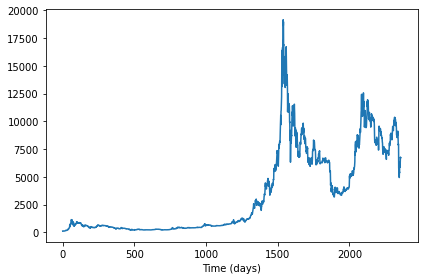

In [17]:
from thinkdsp import Wave

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

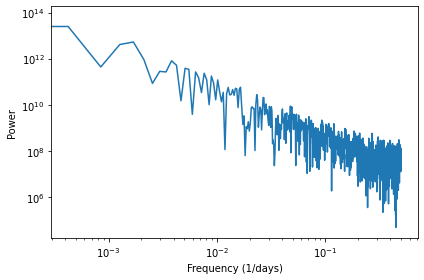

In [18]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)',
         ylabel='Power', 
         **loglog)

In [19]:
spectrum.estimate_slope()[0]

-1.7332540936758951

Красный шум должен иметь наклон -2. Наклон этой PSD близок к 1,7, поэтому трудно сказать, следует ли считать это красным шумом или же это разновидность розового шума


Упражнение 3

In [22]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):

    def evaluate(self, ts):
      
        ys = np.random.poisson(self.amp, len(ts))
        return ys

In [23]:
amp = 0.001
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

In [24]:
expected = amp * framerate * duration
actual = sum(wave.ys)
print(expected, actual)

10.0 10


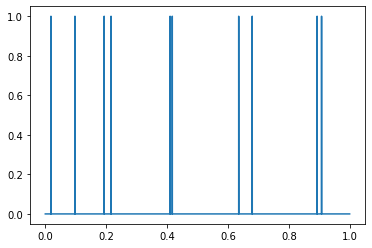

In [25]:
wave.plot()

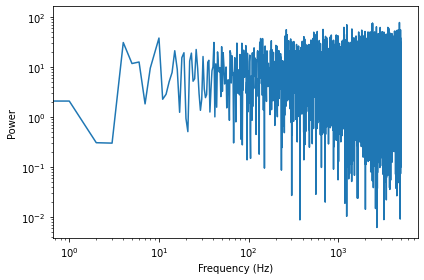

In [26]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [27]:
spectrum.estimate_slope().slope

-0.0019936204702460884

Похоже на белый шум, а наклон близок к 0.

In [28]:
amp = 1
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

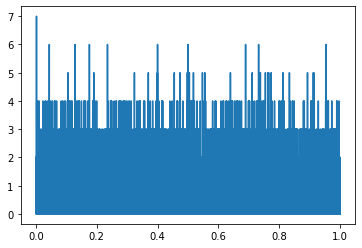

In [29]:
wave.plot()

In [30]:
import matplotlib.pyplot as plt

def normal_prob_plot(sample, fit_color='0.8', **options):

    n = len(sample)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    
    ys = np.sort(sample)
    
    mean, std = np.mean(sample), np.std(sample)
    fit_ys = mean + std * xs
    plt.plot(xs, fit_ys, color='gray', alpha=0.5, label='model')

    plt.plot(xs, ys, **options)

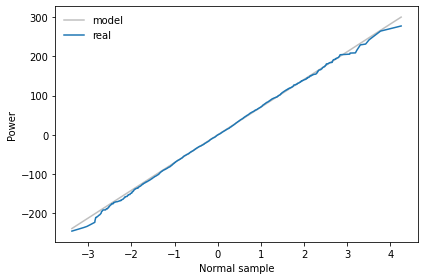

In [31]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0

normal_prob_plot(spectrum.real, label='real')
decorate(xlabel='Normal sample',
        ylabel='Power')

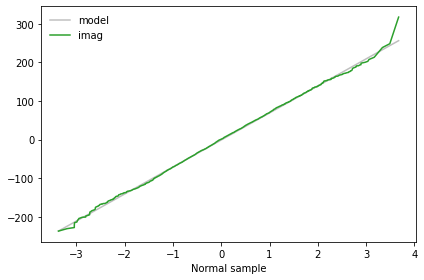

In [32]:
normal_prob_plot(spectrum.imag, label='imag', color='C2')
decorate(xlabel='Normal sample')

4 упражнение

Основная идея этого алгоритма состоит в том, чтобы сложить несколько последовательностей случайных чисел, которые обновляются с разной частотой дискретизации. Первый источник должен обновляться на каждом временном шаге; второй источник через каждый второй временной шаг, третий источник через каждый четвертый шаг и так далее.

In [33]:
nrows = 100
ncols = 5

array = np.empty((nrows, ncols))
array.fill(np.nan)
array[0, :] = np.random.random(ncols)
array[:, 0] = np.random.random(nrows)
array[0:6]

array([[0.22230641, 0.76097067, 0.15257549, 0.71602272, 0.81240429],
       [0.95344749,        nan,        nan,        nan,        nan],
       [0.66467274,        nan,        nan,        nan,        nan],
       [0.98806802,        nan,        nan,        nan,        nan],
       [0.16470647,        nan,        nan,        nan,        nan],
       [0.92008462,        nan,        nan,        nan,        nan]])

Следующим шагом является выбор мест, где случайные источники меняются.

In [34]:
p = 0.5
n = nrows
cols = np.random.geometric(p, n)
cols[cols >= ncols] = 0
cols

array([2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 3, 0, 1, 1, 1,
       0, 2, 3, 1, 1, 1, 3, 1, 3, 1, 1, 2, 4, 1, 2, 3, 3, 2, 1, 3, 1, 1,
       1, 2, 2, 3, 2, 1, 4, 1, 1, 1, 1, 0, 1, 2, 3, 4, 3, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 4, 2, 3, 2, 2, 1, 1, 3, 1, 2, 1, 1, 1, 4, 0, 2, 3, 1,
       3, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 0])

In [35]:
rows = np.random.randint(nrows, size=n)
rows

array([61, 93, 39, 43,  5, 83, 42,  1,  7, 41, 77, 69, 56, 84, 68, 83, 92,
       67,  1, 50, 55, 72, 61, 26, 85, 52, 79,  9, 70, 28, 25, 30, 93,  3,
       82, 83, 42, 46, 41, 78, 80, 83, 44,  2, 55, 73, 57, 86, 53, 85, 26,
       46, 97, 50, 62, 12, 38, 35, 52, 29, 49, 91, 41, 94, 90, 64, 36, 20,
       48, 85, 33, 23, 40, 41, 16, 16,  3, 16, 95, 35, 83, 62, 43, 64, 67,
        3, 96, 22, 18, 80, 58,  2, 52, 74, 86, 58, 27, 64, 87,  5])

In [36]:
array[rows, cols] = np.random.random(n)
array[0:6]

array([[0.22230641, 0.76097067, 0.15257549, 0.71602272, 0.81240429],
       [0.31463761, 0.69110325,        nan,        nan,        nan],
       [0.66467274, 0.97011993,        nan,        nan,        nan],
       [0.98806802, 0.08214439, 0.63145098,        nan,        nan],
       [0.16470647,        nan,        nan,        nan,        nan],
       [0.72714489,        nan,        nan,        nan,        nan]])

In [37]:
df = pd.DataFrame(array)
df.head()

0         1         2         3         4
0  0.222306  0.760971  0.152575  0.716023  0.812404
1  0.314638  0.691103       NaN       NaN       NaN
2  0.664673  0.970120       NaN       NaN       NaN
3  0.988068  0.082144  0.631451       NaN       NaN
4  0.164706       NaN       NaN       NaN       NaN

In [38]:
filled = df.fillna(method='ffill', axis=0)
filled.head()

0         1         2         3         4
0  0.222306  0.760971  0.152575  0.716023  0.812404
1  0.314638  0.691103  0.152575  0.716023  0.812404
2  0.664673  0.970120  0.152575  0.716023  0.812404
3  0.988068  0.082144  0.631451  0.716023  0.812404
4  0.164706  0.082144  0.631451  0.716023  0.812404

In [39]:
total = filled.sum(axis=1)
total.head()

0    2.664280
1    2.686743
2    3.315795
3    3.230090
4    2.406729
dtype: float64

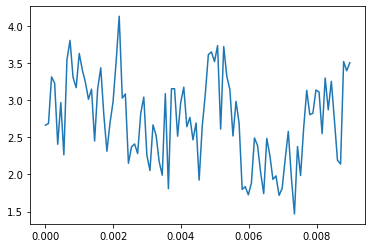

In [40]:
wave = Wave(total.values)
wave.plot()

Вот весь процесс в функции:


In [41]:
def voss(nrows, ncols=16):

    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

In [43]:
ys = voss(11040)
ys

array([8.5902961 , 7.73929882, 7.93925093, ..., 5.90020771, 7.24746538,
       7.45198562])

In [44]:
wave = Wave(ys)
wave.unbias()
wave.normalize()

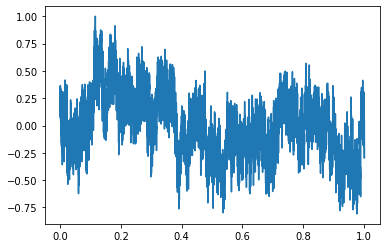

In [45]:
wave.plot()

Как и ожидалось, он больше похож на случайное блуждание, чем белый шум, но выглядит более случайным, чем красный шум.

In [46]:
wave.make_audio()

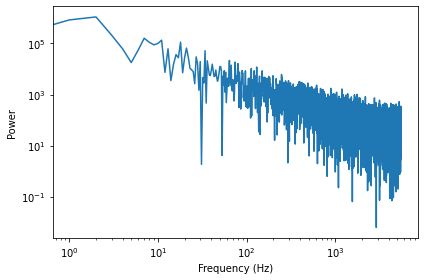

In [47]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [48]:
spectrum.estimate_slope().slope

-0.9989763252573146

In [49]:
seg_length = 64 * 1024
iters = 100
wave = Wave(voss(seg_length * iters))
len(wave)

6553600

In [50]:
spectrum = bartlett_method(wave, seg_length=seg_length, win_flag=False)
spectrum.hs[0] = 0
len(spectrum)

32769

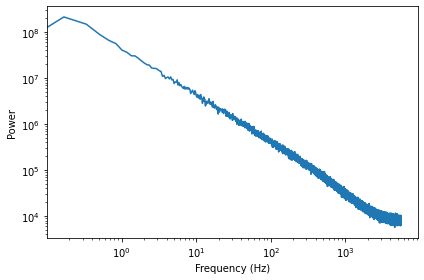

In [51]:
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [52]:
spectrum.estimate_slope().slope

-1.002278217026321

наклон близок к -1.